In [6]:
!pip install kagglehub

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 1, 11, Finished, Available, Finished)

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("open-powerlifting/powerlifting-database")

print("Path to dataset files:", path)

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 1, 13, Finished, Available, Finished)

Path to dataset files: /home/trusted-service-user/.cache/kagglehub/datasets/open-powerlifting/powerlifting-database/versions/2


In [9]:
dataset = "/home/trusted-service-user/.cache/kagglehub/datasets/open-powerlifting/powerlifting-database/versions/2/openpowerlifting-2024-01-06-4c732975.csv"


StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 1, 14, Finished, Available, Finished)

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 1, 26, Finished, Available, Finished)

In [22]:

# Load the dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv(dataset)

# Select relevant columns
subset_df = df[['Age', 'WeightClassKg']].dropna()

# Handle non-numeric values in WeightClassKg
def clean_weight_class(weight):
    try:
        # Remove '+' or other non-numeric characters and convert to float
        return float(weight.replace('+', ''))
    except ValueError:
        return None  # Return None for invalid entries

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 1, 27, Finished, Available, Finished)

/tmp/ipykernel_7530/2672055400.py:2: DtypeWarning: Columns (31,33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset)


In [23]:

# Clean WeightClassKg column
subset_df['WeightClassKg'] = subset_df['WeightClassKg'].apply(clean_weight_class)

# Drop rows with missing or invalid values
subset_df = subset_df.dropna(subset=['WeightClassKg', 'Age'])

# Reset index after cleaning
subset_df.reset_index(drop=True, inplace=True)

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 1, 28, Finished, Available, Finished)

In [24]:

# Standardize 'Age' and 'WeightClassKg'
scaler = StandardScaler()
subset_df[['Age', 'WeightClassKg']] = subset_df[['Age', 'WeightClassKg']]

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 1, 29, Finished, Available, Finished)

In [25]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust n_clusters as needed
kmeans.fit(subset_df[['Age', 'WeightClassKg']])

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 1, 30, Finished, Available, Finished)

KMeans(n_clusters=5, random_state=42)

In [26]:

# Add cluster labels to the original subset
subset_df['Cluster'] = kmeans.labels_

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 1, 31, Finished, Available, Finished)

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 1, 32, Submitted, Running, Running)

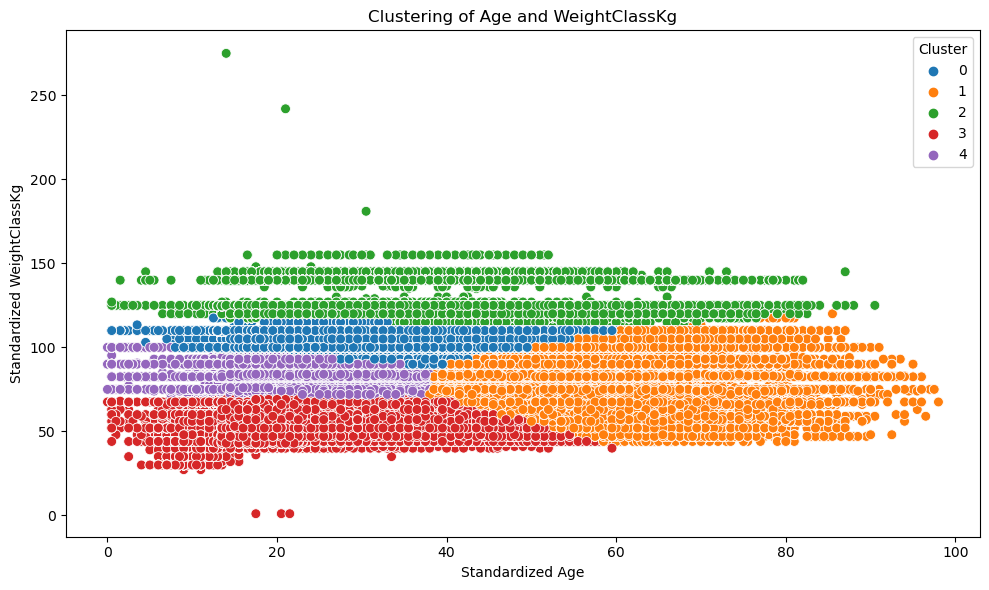

In [27]:

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=subset_df, 
    x='Age', 
    y='WeightClassKg', 
    hue='Cluster', 
    palette='tab10', 
    s=50
)
plt.title("Clustering of Age and WeightClassKg")
plt.xlabel("Standardized Age")
plt.ylabel("Standardized WeightClassKg")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()